In [3]:
import pandas as pd
from IPython import display

In [4]:
red_wine = pd.read_csv('/content/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
#데이터를 7:3으로 분류
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# 스케일링
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# 훈련용 / 테스트용 데이터 분리
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [9]:
print(X_train.shape)

(1119, 11)


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)


])

In [13]:
#모델 컴파일
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [14]:
# 256개의 훈련 데이터 행(batch_size)을 최적화 프로그램에 제공
# 데이터세트(epochs) 전체에 걸쳐 10번 이를 수행
history = model.fit(
    X_train, y_train, validation_data=(X_valid, y_valid),
    batch_size=256, epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 119ms/step - loss: 0.2960 - val_loss: 0.1518
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1447 - val_loss: 0.1353
Epoch 3/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1257 - val_loss: 0.1247
Epoch 4/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1195 - val_loss: 0.1161
Epoch 5/10
5/5 [==============================] - 0s 40ms/step - loss: 0.1115 - val_loss: 0.1066
Epoch 6/10
5/5 [==============================] - 0s 36ms/step - loss: 0.1072 - val_loss: 0.1039
Epoch 7/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1051 - val_loss: 0.1044
Epoch 8/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1029 - val_loss: 0.1011
Epoch 9/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1013 - val_loss: 0.1047
Epoch 10/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1009 - val_loss: 0.1004


<Axes: >

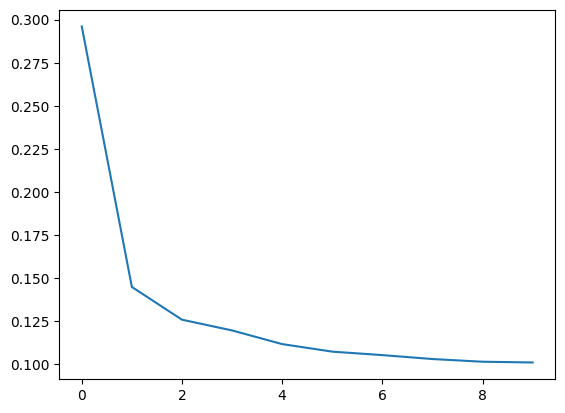

In [15]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()